In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 12.6 MB/s 
     |████████████████████████████████| 9.8 MB 54.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import numpy as np
import pmdarima as pm
from pmdarima import model_selection

print("pmdarima version: %s" % pm.__version__)

# Load the data and split it into separate pieces
data = pm.datasets.load_wineind()
train, test = model_selection.train_test_split(data, train_size=165) # ARIMA를 CV하는 로직. train_size = window의 크기 지정 => blokced CV

# # Even though we have a dedicated train/test split, we can (and should) still
# # use cross-validation on our training set to get a good estimate of the model
# # performance. We can choose which model is better based on how it performs
# # over various folds.
model1 = pm.ARIMA(order=(2, 1, 1))
model2 = pm.ARIMA(order=(1, 1, 2),
                  seasonal_order=(0, 1, 1, 12),
                  suppress_warnings=True)

cv = model_selection.SlidingWindowForecastCV(window_size=100, step=24, h=1) # ARIMA의 paramter를 지정한 order에서 바꿔가면서 search.

model1_cv_scores = model_selection.cross_val_score(
    model1, train, scoring='smape', cv=cv, verbose=2)

model2_cv_scores = model_selection.cross_val_score(
    model2, train, scoring='smape', cv=cv, verbose=2)

print("Model 1 CV scores: {}".format(model1_cv_scores.tolist()))
print("Model 2 CV scores: {}".format(model2_cv_scores.tolist()))

# # Pick based on which has a lower mean error rate
m1_average_error = np.average(model1_cv_scores)
m2_average_error = np.average(model2_cv_scores)
errors = [m1_average_error, m2_average_error]
models = [model1, model2]

# # print out the answer
better_index = np.argmin(errors)  # type: int
print("Lowest average SMAPE: {} (model{})".format(
    errors[better_index], better_index + 1))
print("Best model: {}".format(models[better_index]))

pmdarima version: 1.8.4
[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
Model 1 CV scores: [23.928978083932595, 22.289666116899824, 3.748407783730988]
Model 2 CV scores: [1.482360320464299, 15.413427882685756, 5.572225776595717]
Lowest average SMAPE: 7.48933799324859 (model2)
Best model:  ARIMA(1,1,2)(0,1,1)[12] intercept


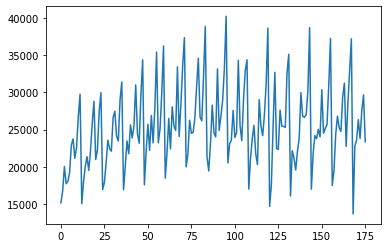

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data)